# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt

import pandas as pd

import scipy.stats as st



# Study data files

mouse_metadata_path = "C:\\Users\\arkha\\OneDrive\\Desktop\\Pymaseuticals Module 5 challenge\\data\\Mouse_metadata.csv"

study_results_path = "C:\\Users\\arkha\\OneDrive\\Desktop\\Pymaseuticals Module 5 challenge\\data\\Study_results.csv"



# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)



# Combine the data into a single DataFrame

study_info_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')



# Display the data table for preview
study_info_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.

mouse_count = len(study_info_df['Mouse ID'].unique())

mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_ids = study_info_df.loc[study_info_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Display the duplicate mice
duplicate_mouse_ids

array(['g989'], dtype=object)

In [6]:
# Get all the data for the duplicate mouse ID.

duplicate_mouse_data = study_info_df.loc[study_info_df["Mouse ID"] == "g989"]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_info_df = study_info_df[study_info_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

clean_study_info_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.

new_mouse_count = len(clean_study_info_df['Mouse ID'].unique())

new_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:


# Since I'm going to be using the same groupby data for each Summary Statistic Calculation, I decided to put it in a variable

drug_tumor = clean_study_info_df.groupby('Drug Regimen')['Tumor Volume (mm3)']


# mean 

per_drug_tumor_mean = drug_tumor.apply(lambda x: st.tmean(x))


# median 

per_drug_tumor_median = drug_tumor.median()


# variance

per_drug_tumor_var = drug_tumor.apply(lambda x: st.tvar(x))


# standard deviation

per_drug_tumor_std = drug_tumor.apply(lambda x: st.tstd(x))


# SEM of the tumor volume

per_drug_tumor_sem = drug_tumor.apply(lambda x: st.tsem(x))



# Assemble the resulting series into a single summary DataFrame.

per_drug_summary_df = pd.DataFrame(
    { 
        'Mean Tumor Volume' : per_drug_tumor_mean, 
        'Median Tumor Volume' : per_drug_tumor_median,
        'Tumor Volume Variance' : per_drug_tumor_var,
        'Tumor Volume Std. Dev.' : per_drug_tumor_std,
        'Tumor Volume Std. Err.' : per_drug_tumor_sem,
    }
)

per_drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# I renamed the columns in the summary so I would get the correct column name for sem, this idea was from ChatGPT

summary = drug_tumor.agg(mean = 'mean', median = 'median', var = 'var', std = 'std', sem = lambda x: x.std() / (len(x) ** 0.5))


# Adding 'Tumor Volume (mm3) to the final dataframe to better match the example. This solution also came from ChatGPT

styled_summary = summary.style.set_caption("Tumor Volume (mm3)")

styled_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [45]:

regimen_counts = clean_study_info_df.groupby('Drug Regimen')['Timepoint'].count()
regimen_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

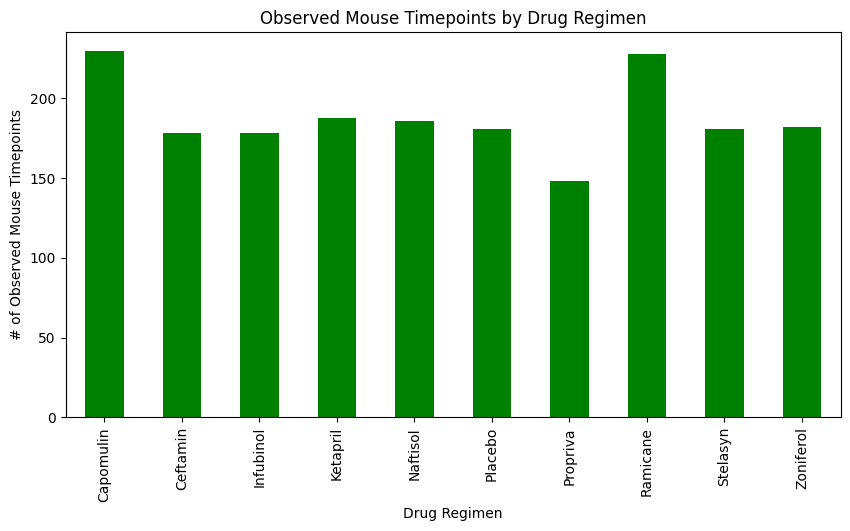

In [51]:
regimen_counts.plot(kind = 'bar', figsize = (10,5), rot = 90, color = 'green', xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints', title = 'Observed Mouse Timepoints by Drug Regimen')

plt.tight_layout

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

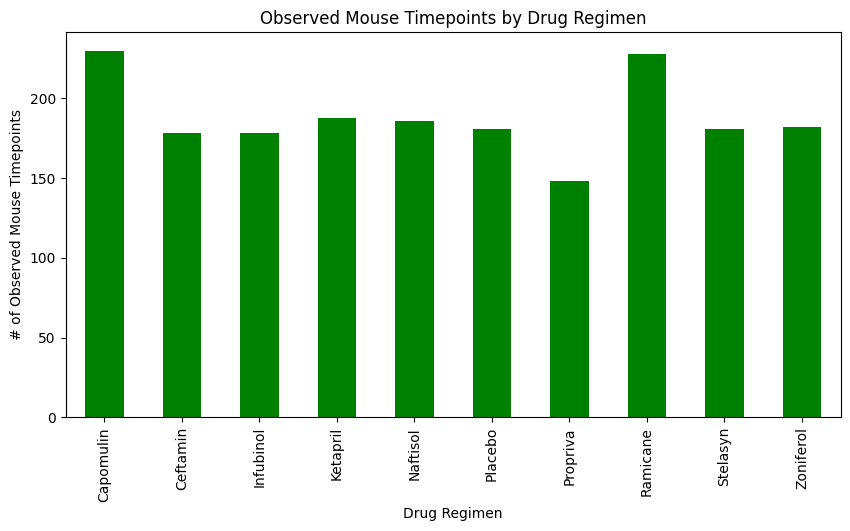

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Determine the number of rows per drug regimen

regimen_counts = clean_study_info_df.groupby('Drug Regimen')['Timepoint'].count()

# Generate the bar plot

regimen_counts.plot(kind = 'bar', 
                    figsize = (10,5), 
                    rot = 90, 
                    color = 'green', 
                    xlabel = 'Drug Regimen', 
                    ylabel = '# of Observed Mouse Timepoints', 
                    title = 'Observed Mouse Timepoints by Drug Regimen'
                    )

plt.tight_layout

plt.show


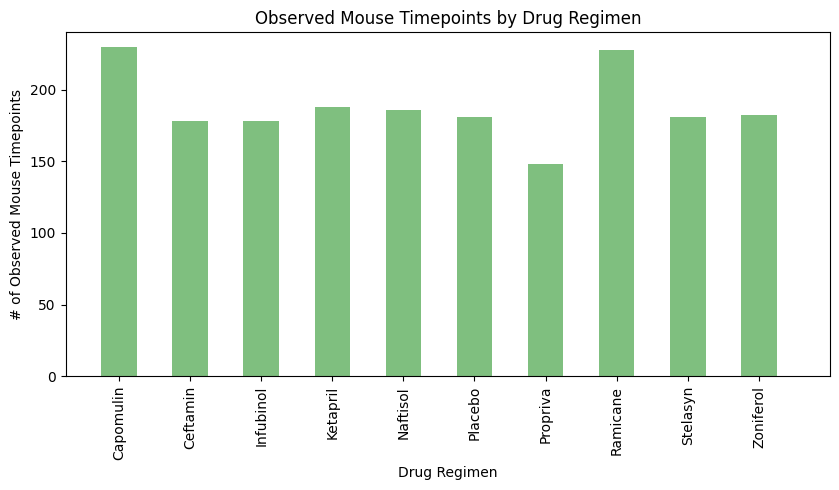

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = range(len(regimen_counts))

plt.figure(figsize=(8.5, 5))

plt.bar(x_axis, regimen_counts.values, color='g', alpha=0.5, align='center', width = .5)

plt.xticks(x_axis, regimen_counts.index, rotation = 'vertical')



plt.xlim(-0.75, len(x_axis))

plt.ylim(0, max(regimen_counts.values) + 10)



plt.title('Observed Mouse Timepoints by Drug Regimen')

plt.xlabel('Drug Regimen')

plt.ylabel('# of Observed Mouse Timepoints')



plt.tight_layout()

plt.show()

In [80]:
unique_mice_gender = clean_study_info_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
unique_mice_gender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

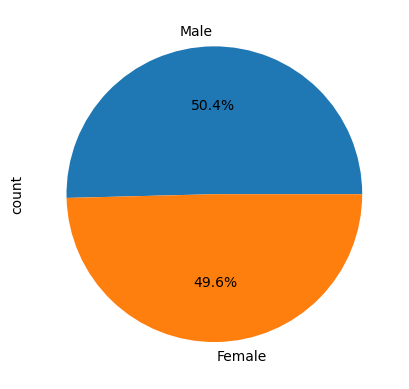

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender



# Make the pie chart
unique_mice_gender

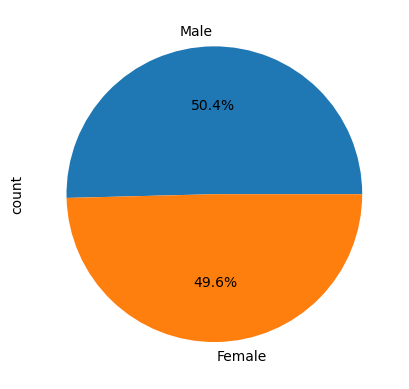

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


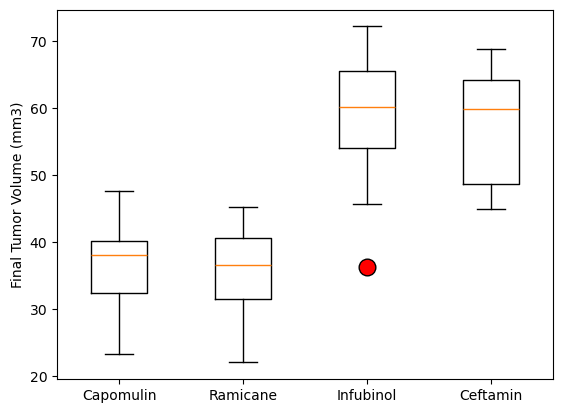

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

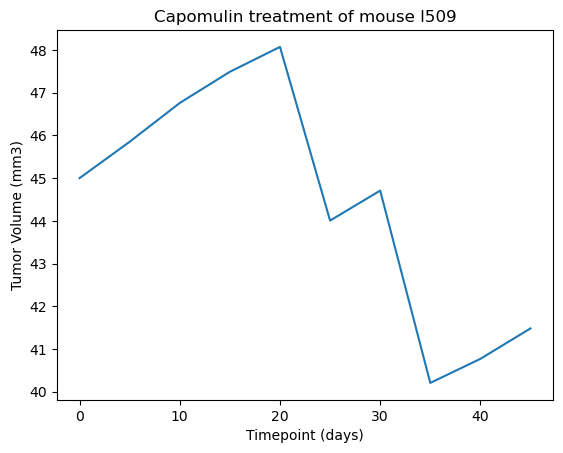

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


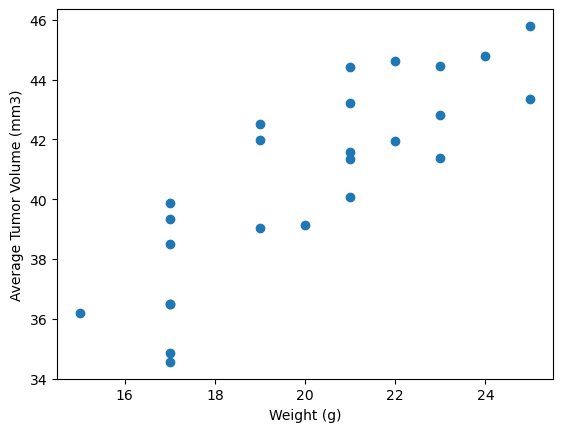

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


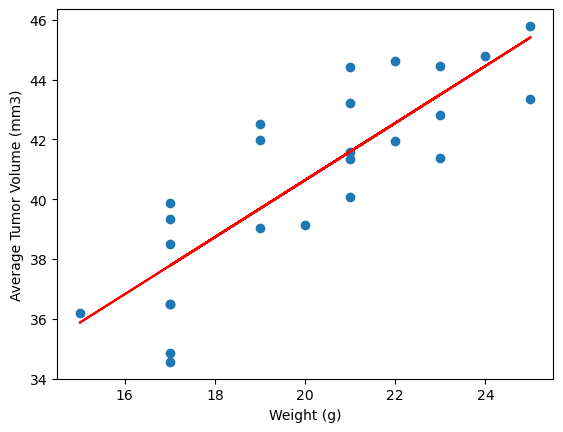

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
